### Метод Ньютона

Задание

1. ответить на все вопросы в скрипте
2. изменить код метода Ньютона так, чтобы он смог разрешать все проблемные случаи, возникающие в скрипте, продемонстрировать это, объяснить почему модификация решает проблему. Проблемы - нулевая производная, кратные корни, биения. Для кратных корней надо так модифицировать метод, чтобы порядок оставался вторым и продемонстрировать это.

ВАЖНО! Модифицированный метод Ньютона должен получаться путем добавления новых строчек в simple_newton, а не переписыванием его с нуля. Новые строчки надо прокомментировать, зачем они были добавлены.

In [153]:
# простая реализация Метода Ньютона
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

def simple_newton(func, dfunc, x, tol = 1e-12):
    sol = 0
    iteration = 0
    dxs = []
    for i in range(30):
        iteration += 1
        dx = -func(x)/dfunc(x)
        dxs.append(abs(dx))
        x = x + dx
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration]

In [154]:
# модифицированная реализация Метода Ньютона
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

def notsimple_newton(func, dfunc, x, tol = 1e-12, k = 1): # добавляем k - кратность корня, которую будем опраделять "ручками"
    sol = 0
    iteration = 0
    dxs = []
    for i in range(30):
        iteration += 1
        if dfunc(x) == 0:              # Добавляем проверку на равенство нулю производной,
            dx = k*(-func(x)/0.02)     # если производная = 0, то заменяем на на соответствующую
        else:                          # по коду формулу. Объясняется стремлением к нулю производной,
            dx = k*(-func(x)/dfunc(x)) # аналогия 0,0001 как б.м. величины.
        dxs.append(abs(dx))            # По умалочанию k = 1, и наша формула из простой реализации метода  
        x = x + dx                     # Нюьтона не изменится, зато теперь будет верной для k > 1              
        if abs(dx) < tol:                           
            sol = x                                
            return [sol, iteration, dxs]
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration]

#### Нелинейное уравнение 1

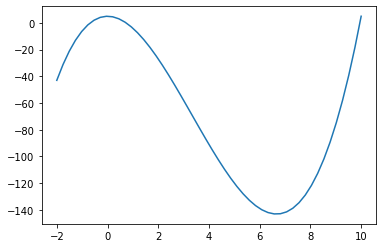

In [155]:
x = np.linspace(-2,10)
func0 = lambda x: x**3 - 10*x**2 + 5
dfunc0 = lambda x: 3*x**2 - 20*x
y = func0(x)
plt.plot(x, y)

1. Объяснить, почему различаются результаты в случае 1 и 2
2. Объяснить, что происходит в случае 3
3. Построить график порядка сходимости от номера итерации. Объяснить результат

In [156]:
data = simple_newton(func0, dfunc0, 8) # случай 1
data1 = simple_newton(func0, dfunc0, 0.7) # случай 2
data2 = notsimple_newton(func0, dfunc0, 0.0) # случай 3
print('sol = ', data[0])
print('iter = ', data[1])

print('--------------------------------')
print('sol = ', data2[0])
print('iter = ', data2[1])

sol =  9.949491057914388
iter =  7
--------------------------------
sol =  -0.6840945657036894
iter =  18


1.  По достаточным условиям для использования метода Ньютона нам необходимо выбрать такой $x_0 \in [a, b]$, чтобы $f(a)\cdot(b)   < 0$ и $f(x_0)\cdot f"(x_0) > 0$. Учитываем, что $d^2f = 6x + 20$. Ближайший $x_0$, удовлетворяющий этим условиям и находящийся близко к нашему корню (случай   2) - это $x_0 = 9,95 \in [7, 11]$. Кроме того можно оценить знак $dx$ "левее" от корня  $x = 9,949491...$ $dx$ будет иметь     знак плюс, правее - минус. Соответственно начальное приближение из этого промежутка может "двигать только в сторону этого       корня". 

      Аналогичная ситуация для второго корня (случай 1). (Явление наблюдается если запустить обе функции сразу, поочередно выдёт один результат


2. В случае 3, $f'(x_0) = 0$, и мы не можем использовать наш метод, т.к. не определён $dx$


3. Графики:

Text(0, 0.5, 'порядок')

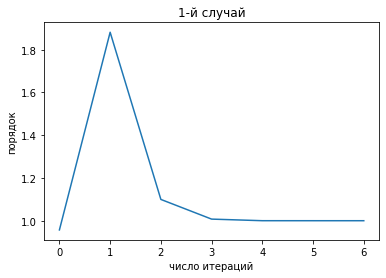

In [157]:
# для случая 1
x_0 = 8
P = list()
for i in (data[2]):
    P.append((np.log(abs(x_0 + i - data[0])))/(np.log(abs(x_0 - data[0]))))
    x_0 += i;
plt.plot(range(len(P)), P)
plt.title('1-й случай')
plt.xlabel('число итераций')
plt.ylabel('порядок')

Text(0, 0.5, 'порядок')

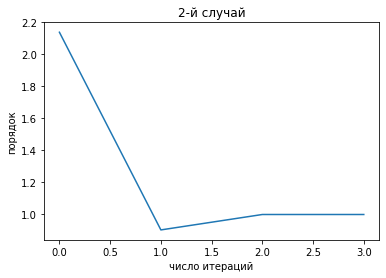

In [158]:
x_0 = 0.7
P = list()
for i in (data1[2]):
    P.append((np.log(abs(x_0 + i - data1[0])))/(np.log(abs(x_0 - data1[0]))))
    x_0 += i;
plt.plot(range(len(P)), P)
plt.title('2-й случай')
plt.xlabel('число итераций')
plt.ylabel('порядок')

Text(0, 0.5, 'порядок')

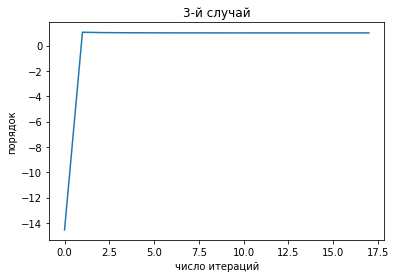

In [159]:
x_0 = 0.0
P = list()
for i in (data2[2]):
    P.append((np.log(abs(x_0 + i - data2[0])))/(np.log(abs(x_0 - data2[0]))))
    x_0 += i;
plt.plot(range(len(P)), P)
plt.title('3-й случай')
plt.xlabel('число итераций')
plt.ylabel('порядок')

Если подставить в изменённый способ в качестве изменения расчёта dx для нулевой производной в знаменатель подставить 0,02, то питон чертит график, при 0,0001 - out of range (для for)

#### Нелинейное уравнение 1

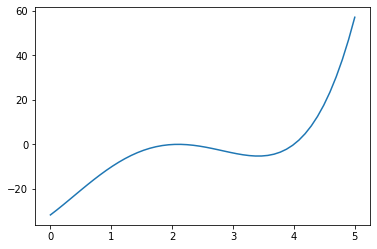

In [160]:
x = np.linspace(0,5)
func1 = lambda x: x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752 #double root
dfunc1 = lambda x: 4.0*x**3 - 19.2*x**2 + 12.9*x + 20.538
y = func1(x)
plt.plot(x, y)

1. Построить график порядка сходимости от номера итерации. Объяснить результат

Text(0, 0.5, 'порядок')

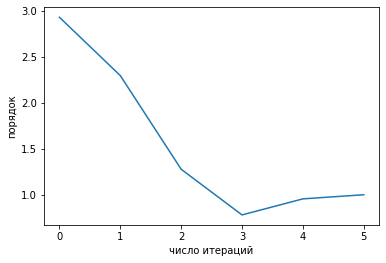

In [161]:
data = notsimple_newton(func1, dfunc1, 2.0, k=2)
x_0 = 2.0
P = list()
for i in (data[2]):
    P.append((np.log(abs(x_0 + i - data[0])))/(np.log(abs(x_0 - data[0]))))
    x_0 += i;
plt.plot(range(len(P)), P)
plt.xlabel('число итераций')
plt.ylabel('порядок')

#### Нелинейное уравнение 3

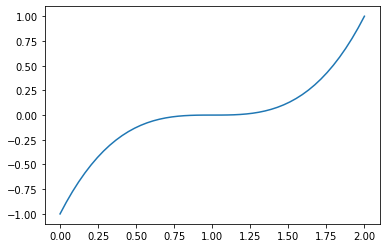

In [162]:
x = np.linspace(0,2)
func2 = lambda x: (x-1)**3
dfunc2 = lambda x: 3*(x-1)**2
y = func2(x)
plt.plot(x, y)

1. Подобрать начальное приближение и решить задачу

Начально приближение наёдем, используя достаточное условие сходимости метода Ньютона:

Нужен $[a;b]$, котороый будет удовлетворять условию - $f(a)f(b)<0$ , нам подойдёт $[0;2]$.

Заметим, что $f^{''}(x_0) = 6(x_0-1)$ и должно выполняться неравенство $f(x_0)\cdot f^{''}(x_0) > 0$, в качестве точки $x_0$ нам подойдёт $x=0,17$. 

In [163]:
data = notsimple_newton(func2, dfunc2, 0.17, k=3)
print('sol = ', data[0])
print('iter = ', data[1])

sol =  1.0
iter =  2


#### Нелинейное уравнение 4

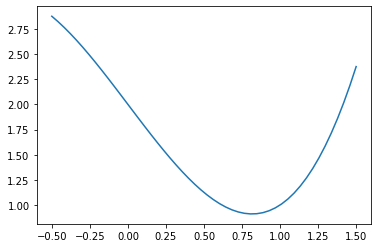

In [164]:
x = np.linspace(-0.5,1.5)
#x = np.linspace(-5,5)
func3 = lambda x: x**3 - 2*x + 2
dfunc3 = lambda x: 3*x**2 - 2
y = func3(x)
plt.plot(x, y)

1. Почему не находится решение во втором случае?

In [165]:
data = simple_newton(func3, dfunc3, 0.5) # случай 1
#data = simple_newton(func3, dfunc3, 0) # случай 2
print('sol = ', data[0])
print('iter = ', data[1])

sol =  -1.7692923542386314
iter =  10


Во втором случае наблюдаем биения, по стандартному алгоритму происходит больше 30 итераций !!!

In [142]:
data = simple_newton(func3, dfunc3, 0) # случай 2

More then 30 iterations!
